### 데이터 : 서울시 구별 CCTV 대수 + 서울시 구별 인구수 (전체, 한국인, 외국인, 65세이상고령자)

## 목적 : 데이터 분석

In [1]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 폰트 설치후 반드시 재시작!!
**런타임>세션 및 다시 시작**

In [2]:
# matplotlib 나눔바른고딕체로 폰트 변경하기
import matplotlib.pyplot as plt
#앞에서 설치한 폰트를 설정
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 데이터 파일을 가져오기 위해 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#코드 및 데이터 세팅

#데이터 파일 가져오기
# CCTV csv파일 가져오기
csvPath = '/content/drive/MyDrive/DataScience/data/01. CCTV_in_Seoul.csv'
# 인구 xls파일 가져오기
xlsPath = '/content/drive/MyDrive/DataScience/data/01. population_in_Seoul.xls'

#페키지 다운로드
import pandas as pd
import numpy as np

#파일 읽기
# type: DataFrame (not list, dict, or tuple!!)
cctv_seoul = pd.read_csv(csvPath, encoding='utf-8')
pop_seoul = pd.read_excel(xlsPath, header=2, usecols='B, D, G, J, N') #usecols를 알기 위해서는 먼저 excel 파일의 내용을 눈으로 확인한 후에 선택한다

#파일 확인
# info(), describe(), head(),tail()로 파일 확인
print(cctv_seoul.info())
print(cctv_seoul.describe())
print(cctv_seoul.head())
print(cctv_seoul.tail())

print(pop_seoul.info())
print(pop_seoul.describe())
print(pop_seoul.head())
print(pop_seoul.tail)

pop_seoul.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
None
                소계    2013년도 이전       2014년       2015년       2016년
count    25.000000    25.000000   25.000000   25.000000   25.000000
mean   1179.080000   764.760000  159.480000  205.200000  385.880000
std     556.728983   415.510257  104.132976  137.877059  182.479981
min     485.000000   238.000000   21.000000   30.000000   81.000000
25%     748.000000   464.000000   78.000000  103.000000  292.000000
50%    1015.000000   573.000000  142.000000  184.000000  377.000000
75%    1496.000000  1070.000000  218.000000  269.000000

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [5]:
#컬럼명 기관명 -> '구별'
cctv_seoul.rename(columns={'기관명': '구별'}, inplace=True) # 수정한 것을 적용 할려면 inplace=True 쓰기!!
# cctv_seoul.rename(columns={cctv_seoul.columns[0]: '구별'}, inplace=True)도 가능
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
cctv_seoul['최근증가율']=(cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [7]:
# 데이터에 질문을 던지자!
#가장 CCTV대수가 많은 구는 어디? 적은 구는 어디?
#소계를 지준으로 가장 많은 구 5개, 적은 구 5개
cctv_seoul.sort_values(by='소계', ascending=False).head(10) #default:5개

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374
6,구로구,1561,1142,173,246,323,64.973730
4,관악구,1496,846,260,390,613,149.290780
16,성북구,1464,1009,78,360,204,63.627354
10,동대문구,1294,1070,23,198,579,74.766355
8,노원구,1265,542,57,451,516,188.929889


In [8]:
cctv_seoul.sort_values(by='소계', ascending=True).head(5)
#cctv_seoul.sort_values(by='소계', ascending=False).tail(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
17,송파구,618,529,21,68,463,104.347826
24,중랑구,660,509,121,177,109,79.960707
23,중구,671,413,190,72,348,147.699758


In [9]:
# 질문 : 최근 증가율이 가장 높은 5구, 가장 적은 5구
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(10) #default: 5개

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


In [10]:
cctv_seoul.sort_values(by='최근증가율', ascending=True).head(5)
# cctv_seoul.sort_values(by='최근증가율', ascending=False).tail(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266


In [11]:
# cctv_seoul에서 '2013년도 이전', '2014년', '2015년', '2016년' 컬럼을 삭제
# cctv_seoul.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1) #default: inplace=False 수정 적용하지 않고 출력
cctv_seoul.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True) #inplace=True 수정 적용
cctv_seoul.head()

,구별,소계,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [12]:
#줄 바뀜도 데이터로 들어왔는지 확인
cctv_seoul.tail()

,구별,소계,최근증가율
20,용산구,1624,53.216374
21,은평구,1873,85.237258
22,종로구,1002,248.922414
23,중구,671,147.699758
24,중랑구,660,79.960707


### 서울 인구

In [13]:
# 컬럼명 확인하기
pop_seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [14]:
# 컬럼명 변경하기
pop_seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [15]:
# 불피요한 행[0,26]을 삭제하기
# pop_seoul.drop([0,26]) # 25행까지 출력
# pop_seoul.drop([0,26], inplace=True) #inplace=True 수정 적용 #두 번 적용 오류
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [16]:
# index 번호를 0~24로 변경
# pop_seoul.reset_index(drop=False) #drop=False 기존의 인덱스에 덧붙어 인덱스 추가하기
pop_seoul.reset_index(drop=True, inplace=True) #drop=True 기존의 인덱스 값을 지우고 다시 쓰기
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [17]:
# cctv_seoul, pop_seoul 데이터프레임 합치기
#merge,concat,join
# data_result=pd.merge(cctv_seoul, pop_seoul, on='구별') #merge 장점: 기존 행에 적용할 수 있음?????
data_result=pd.merge(pop_seoul, cctv_seoul, on='구별') #인구가 왼쪽, CCTV오른쪽
data_result

,구별,인구수,한국인,외국인,고령자,소계,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621
5,동대문구,369496.0,354079.0,15417.0,54173.0,1294,74.766355
6,중랑구,414503.0,409882.0,4621.0,56774.0,660,79.960707
7,성북구,461260.0,449773.0,11487.0,64692.0,1464,63.627354
8,강북구,330192.0,326686.0,3506.0,54813.0,748,125.203252
9,도봉구,348646.0,346629.0,2017.0,51312.0,485,246.638655


In [18]:
# 고령자의 비율
data_result['고령자비율']=data_result['고령자']/data_result['인구수']*100
data_result['외국인비율']=data_result['외국인']/data_result['인구수']*100
data_result.head()

,구별,인구수,한국인,외국인,고령자,소계,최근증가율,고령자비율,외국인비율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [19]:
data_result.columns=['구별','인구수','한국인','외국인','고령자', 'CCTV대수', 'CCTV증가율','고령자비율','외국인비율',]
data_result.head()

,구별,인구수,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [20]:
# cctv_seoul의 수치형 데이터 int64, float64인 컬럼 데이터의 통계치를 보여준다
cctv_seoul.head()

,구별,소계,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [21]:
cctv_seoul.tail()

,구별,소계,최근증가율
20,용산구,1624,53.216374
21,은평구,1873,85.237258
22,종로구,1002,248.922414
23,중구,671,147.699758
24,중랑구,660,79.960707


In [22]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [23]:
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [24]:
# matplotlib으로 그래프를 그리기 위해서는 index를 '구별'로 변경
data_result.set_index('구별', inplace=True)
data_result.head()

,인구수,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
구별,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


# Matplotlib

### matplotlib의 CheetSheet
https://matplotlib.org/cheatsheets/

<Axes: ylabel='구별'>

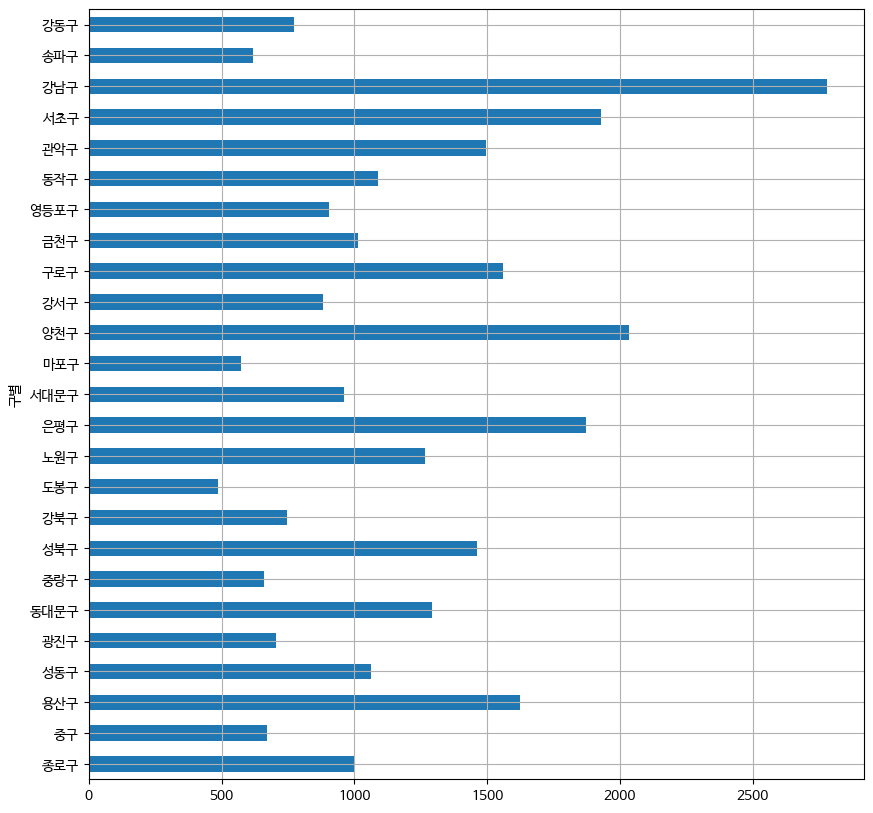

In [25]:
# data_result['CCTV대수']를 barh 형태로 plot하자
data_result['CCTV대수'].plot(kind='barh', grid=True, figsize=(10,10)) #x-axis는 index값으로 그린다

<Axes: ylabel='구별'>

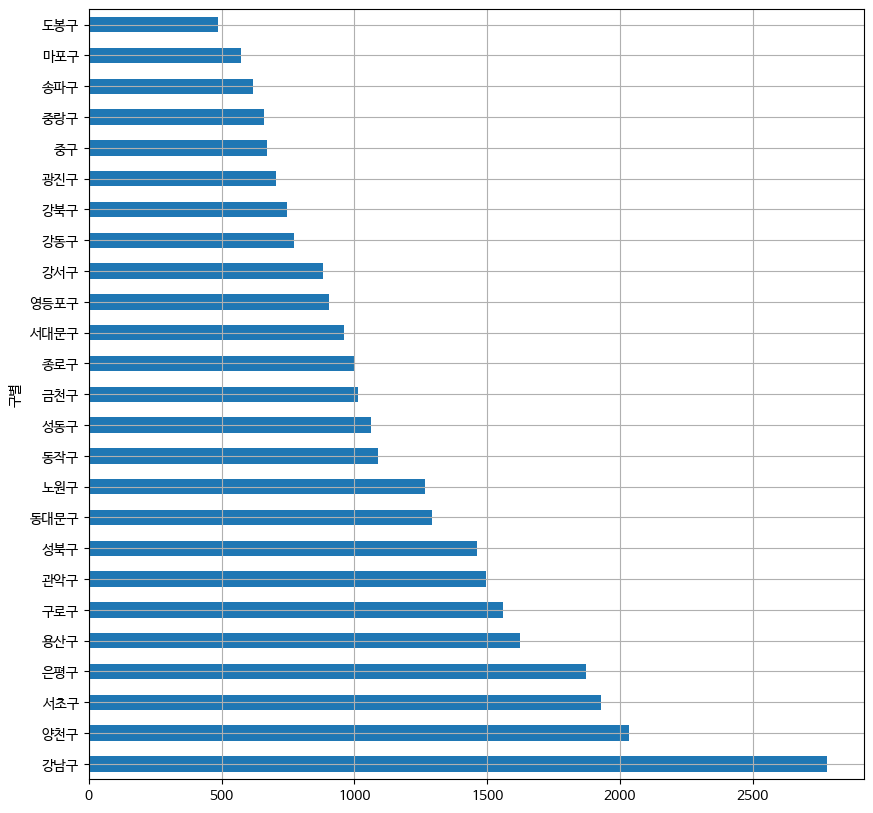

In [26]:
# matplotlib으로 'CCTV대수'를 기준으로 가장 많은 구부터 출력
#sort_values를 data_result에 저장하고, 다음 줄에서 plot
data_result.sort_values(by='CCTV대수', ascending=False, inplace=True) #CCTV대수를 기준으로 정렬 적용
data_result['CCTV대수'].plot(kind='barh', grid=True, figsize=(10,10))

<Axes: ylabel='구별'>

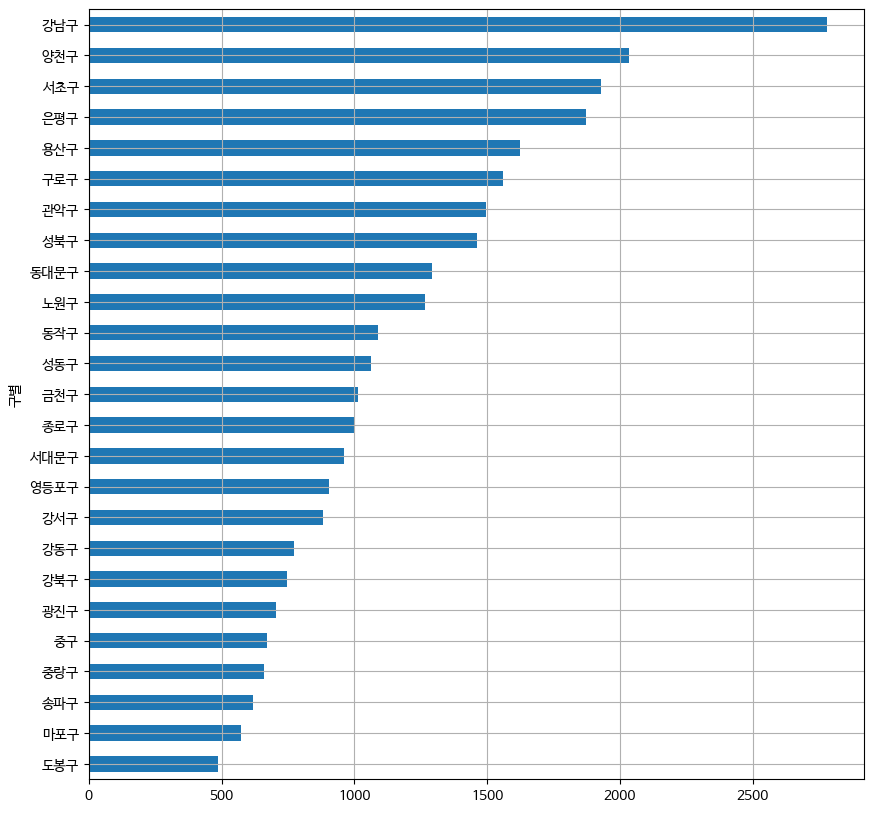

In [27]:
data_result['CCTV대수'].sort_values(ascending=True).plot(kind='barh', grid=True, figsize=(10,10)) #inplace=True 필요 없이 출력

<Axes: xlabel='구별'>

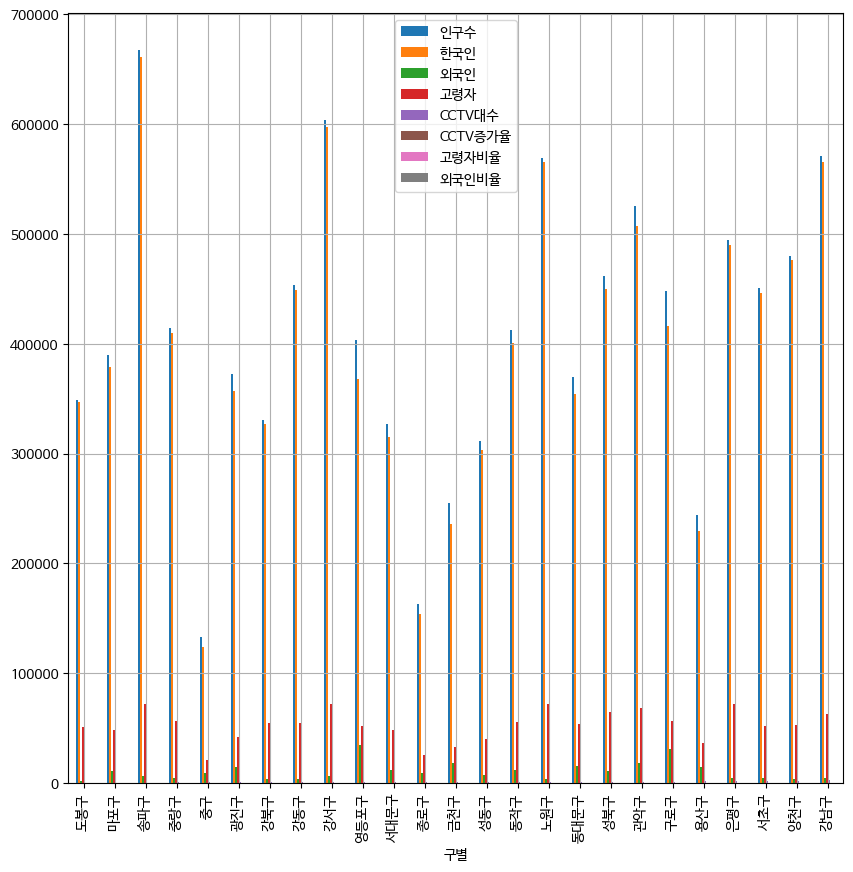

In [28]:
data_result.sort_values(by='CCTV대수', ascending=True).plot(kind='bar', grid=True, figsize=(10,10)) #inplace=True 필요 없이 출력

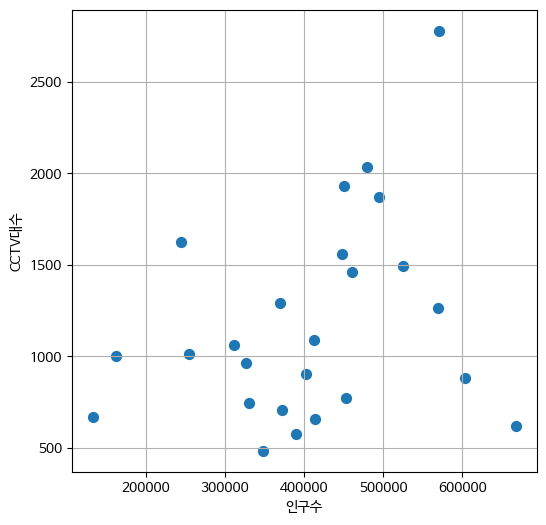

In [31]:
# matplotlib으로 가로측은 '인구', 새로축은 CCTV대수 scatterplot
plt.figure(figsize=(6,6))
# 신정도(x,y)
plt.scatter(data_result['인구수'], data_result['CCTV대수'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.grid()
plt.show()

In [32]:
# x,y 데이터를 받아들여서 1차함수를 생성(직선의 방정식)
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV대수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

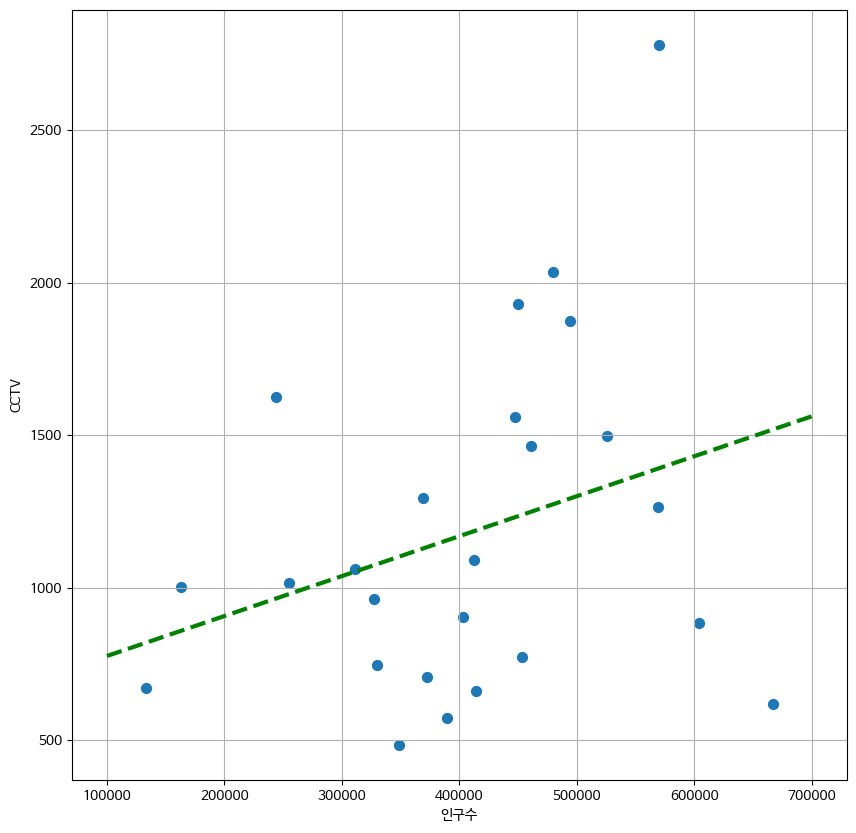

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['CCTV대수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [35]:
data_result['오차'] = np.abs(data_result['CCTV대수'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,인구수,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율,오차
구별,,,,,,,,,
강남구,570500.0,565550.0,4950.0,63167.0,2780,150.619195,11.072217,0.867660,1388.055355
송파구,667483.0,660584.0,6899.0,72506.0,618,104.347826,10.862599,1.033584,900.911312
양천구,479978.0,475949.0,4029.0,52975.0,2034,34.671731,11.036964,0.839413,760.563512
서초구,450310.0,445994.0,4316.0,51733.0,1930,63.371266,11.488308,0.958451,695.403794
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828,659.231690


<ipython-input-41-e938b4ce9c88>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV대수'][n]*0.98,


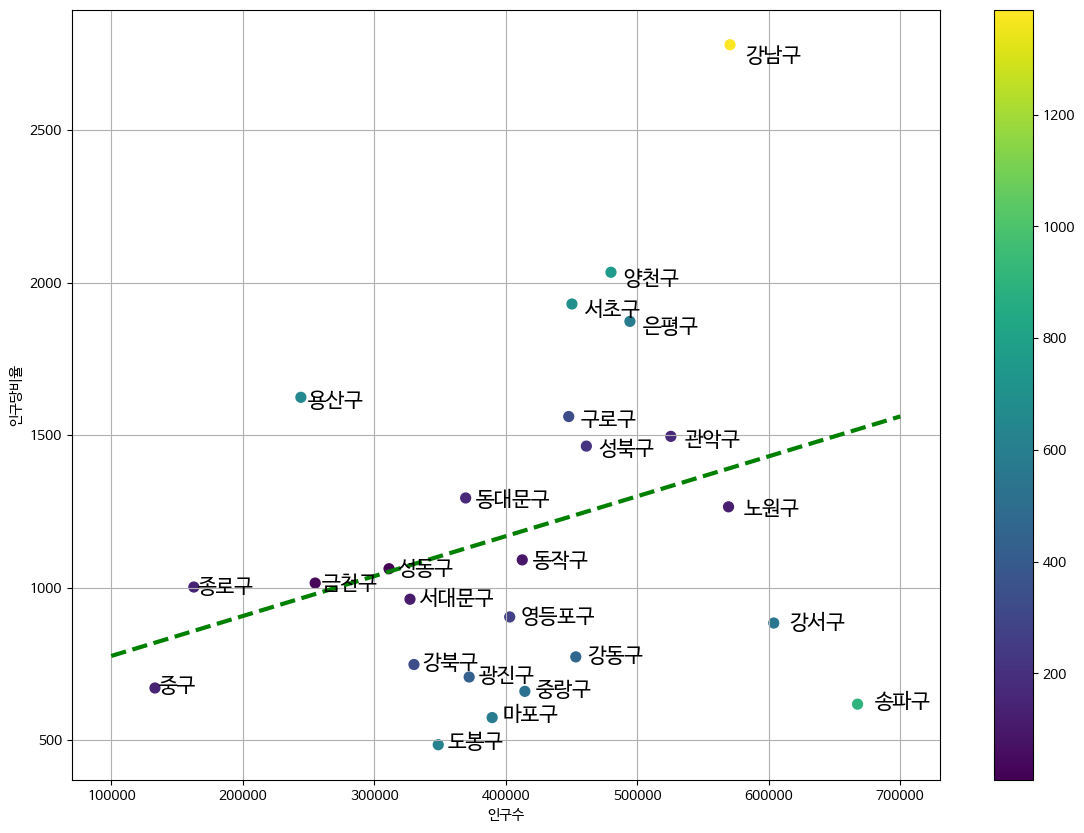

In [41]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV대수'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV대수'][n]*0.98,
             df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

<ipython-input-43-eff23f4621bf>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구수'][n], df_sort['CCTV대수'][n],


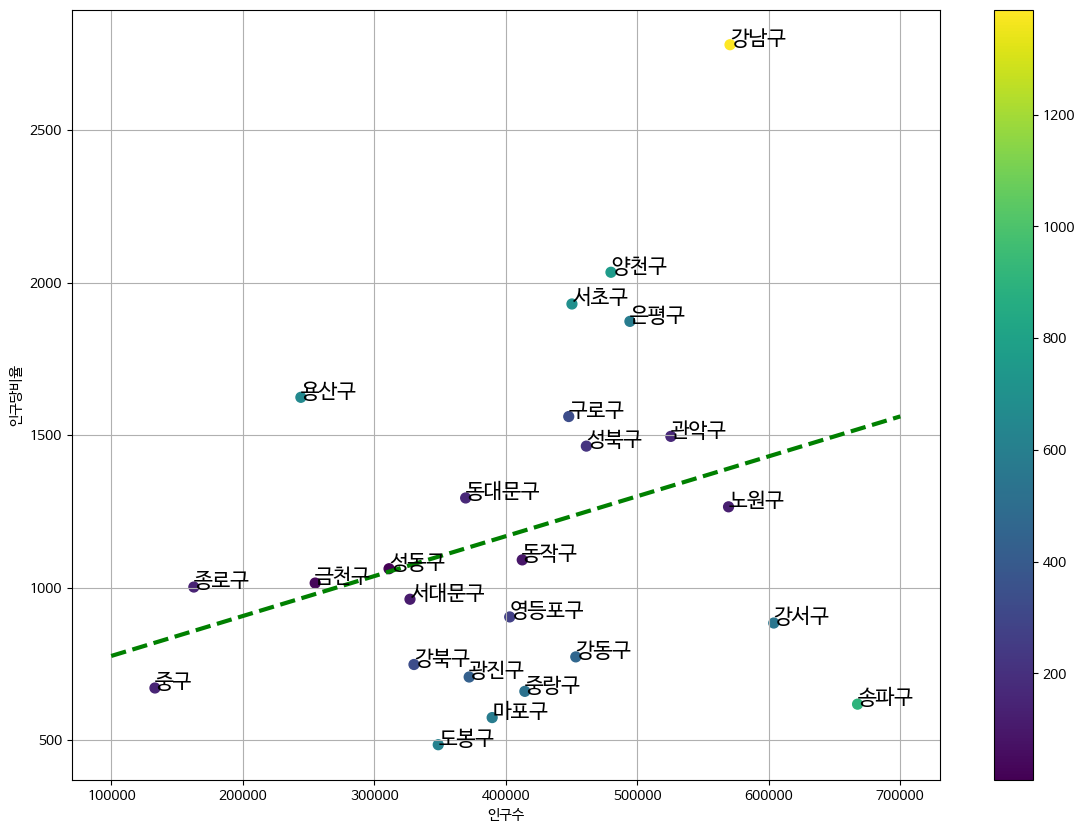

In [43]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV대수'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(df_sort['인구수'][n], df_sort['CCTV대수'][n],
             df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

<ipython-input-39-d341f4fdd3e9>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구수'][n]+7500, df_sort['CCTV대수'][n]-25,


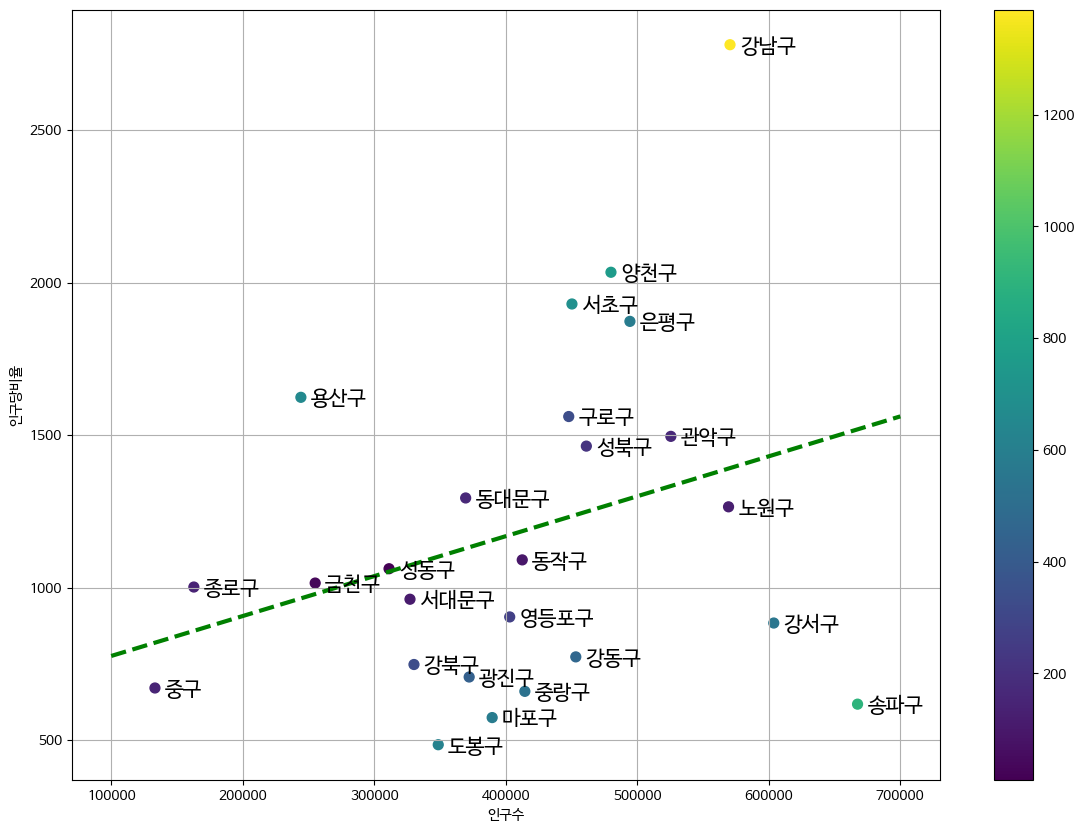

In [39]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV대수'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(df_sort['인구수'][n]+7500, df_sort['CCTV대수'][n]-25,
             df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()